# ***Installation***

In [1]:
!pip install mlbox

# ***Importing libraries***

In [2]:
#MLBox mainly has 3 sub-packages which need to be imported. These packages are: preprocessing, optimization, and prediction. 
#Each one of them is respectively aimed at reading and preprocessing data, testing or optimizing a wide range of learners, and predicting the target on a test dataset. 
import mlbox
from mlbox.preprocessing import *
from mlbox.optimisation import *
from mlbox.prediction import *
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

# ***A) Pre-Processing***

---



***Step 1 : Getting the path of the data***

---

We have to provide the train and test path as a list and then provide the target variable which we want to predict.

Make sure your test data doesn’t have a target variable otherwise below code will show "no test data found".

In [3]:
train_path = "titanic_train.csv"
test_path = "titanic_test.csv"

In [4]:
paths = [train_path, test_path]
target_name = 'survived' 

***Step 2: Creating an object of the Reader class and splitting the data***

In [5]:
rd = Reader(sep = ",")
df = rd.train_test_split(paths, target_name)   #reading and preprocessing (dates, ...)

#this actually returns a dictionary type, that means the data type of “data” is dict with keys as [:
# [‘train’, ‘test’, ‘target’]] and values as the data frame(the content of the csv file) corresponding to the train, test, targe


reading csv : titanic_train.csv ...
cleaning data ...
CPU time: 4.896754741668701 seconds

reading csv : titanic_test.csv ...
cleaning data ...
CPU time: 0.05246615409851074 seconds

> Number of common features : 9

gathering and crunching for train and test datasets ...
reindexing for train and test datasets ...
dropping training duplicates ...
dropping constant variables on training set ...

> Number of categorical features: 5
> Number of numerical features: 4
> Number of training samples : 558
> Number of test samples : 264

> You have no missing values on train set...

> Task : classification
0.0    328
1.0    230
Name: survived, dtype: int64

encoding target ...


# ***B) Removing the Drifting Variables***

---

# Drifting Concept : 
When we predict the dependent (target) variable, we assume that that train and test dataset is created through the same generative algorithm or process and it will not change over time. But in the real world, the data generation process can change and it can result in poor and degrading predictive performance in predictive models that assume a static relationship between input and output variables. So, removing those variables is crucial for better prediction. This is done automatically by MLBox just by running the following code

***Step 3: Create an object of class Drift_thresholder***

In [6]:
dft=Drift_thresholder()

***Step 4: Use the fit_transform method of the created object to remove the drift variables***

In [8]:
data=dft.fit_transform(df)


computing drifts ...
CPU time: 0.2081139087677002 seconds

> Top 10 drifts

('fare', 0.06655262300423592)
('alone', 0.058691756272401197)
('embark_town', 0.04780330183555992)
('class', 0.0426849136526557)
('n_siblings_spouses', 0.03608667318344727)
('age', 0.0247637666992504)
('sex', 0.021546106223525596)
('deck', 0.008811230585424212)
('parch', 0.005661453242098435)

> Deleted variables : []
> Drift coefficients dumped into directory : save


# ***C) Optimization***

---



This hyperparameter optimization method in this library uses the hyperopt library which is very fast and you can almost optimize anything in this library from choosing the right missing value imputation method to the depth of an XGBOOST model.
Below is the list of four optimizations which is automatically done by MLBox:
1. Missing Values Encoder(NA Encoder)
numerical_strategy (when the column to be imputed is a continuous column eg- mean, median, etc), categorical_strategy(when the column to be imputed is a categorical column e.g.- NaN values, etc)
2. Categorical Values Encoder(CA Encoder)
strategy (method of encoding categorical variables e.g.- label_encoding, dummification, random_projection, entity_embedding)
3. Feature Selector(FS)
strategy (different methods for feature selection e.g. l1, variance, rf_feature_importance), threshold (the percentage of features to be discarded)
4. Estimator(est)
strategy (different algorithms that can be used as estimators e.g. — LightGBM, xgboost, etc.), **params(parameters specific to the algorithm being used e.g. — max_depth, n_estimators, etc.)


***Step 5: Create an object of class Optimiser and evaluate the model***

In [9]:
# Setting up optimiser object
opt = Optimiser(scoring='accuracy')
warnings.filterwarnings('ignore', category=DeprecationWarning)
score1 = opt.evaluate(None, df)

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:74: UserWarning: Optimiser will save all your fitted models into directory 'save/joblib'. Please clear it regularly.
  +str(self.to_path)+"/joblib'. Please clear it regularly.")


No parameters set. Default configuration is tested

##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}


MEAN SCORE : accuracy = 0.7204301075268817
VARIANCE : 0.010752688172043001 (fold 1 = 0.7311827956989247, fold 2 = 0.7096774193548387)
CPU time: 0.34883880615234375 seconds



# ***Predictions***

***Step 6: Create an object of Predict Class and predict the test data using the hyperparameters selected above.***


> No parameters set. Default configuration is tested

fitting the pipeline ...
CPU time: 0.2591536045074463 seconds


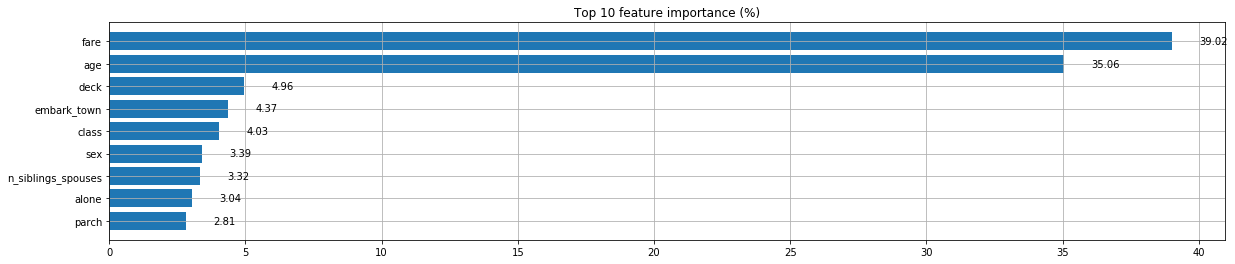


> Feature importances dumped into directory : save

predicting ...
CPU time: 0.044527530670166016 seconds

> Overview on predictions : 

        0.0       1.0  survived_predicted
0  0.982095  0.017905                   0
1  0.997978  0.002022                   0
2  0.462928  0.537072                   1
3  0.495101  0.504899                   1
4  0.940618  0.059382                   0
5  0.118910  0.881090                   1
6  0.973520  0.026480                   0
7  0.983862  0.016138                   0
8  0.854920  0.145080                   0
9  0.154986  0.845014                   1

dumping predictions into directory : save ...


In [10]:
pred = Predictor()
# For Default Configuration
pred.fit_predict(None, df)

# ***Creating Customised Search Space***

---



In [13]:
space = {
'ne__numerical_strategy': {"search":"choice", "space":[0, "mean"]},
'ce__strategy': {"search":"choice", "space":["label_encoding", "random_projection", "entity_embedding"]},
'fs__threshold':{"search":"uniform", "space":[0.001, 0.2]},
'est__strategy':{"search":"choice", "space":["RandomForest",
"ExtraTrees", "LightGBM"]},
'est__max_depth':{"search":"choice",
"space":[8, 9, 10, 11, 12, 13]}
}
best = opt.optimise(space, df)

##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'random_projection'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.0724211220524144}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 10, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
MEAN SCORE : accuracy = 0.7293906810035842
VARIANCE : 0.01254480286738352 (fold 1 = 0.7419354838709677, fold 2 = 0.7168458781362007)
CPU time: 0.44864654541015625 


fitting the pipeline ...
CPU time: 3.120185375213623 seconds


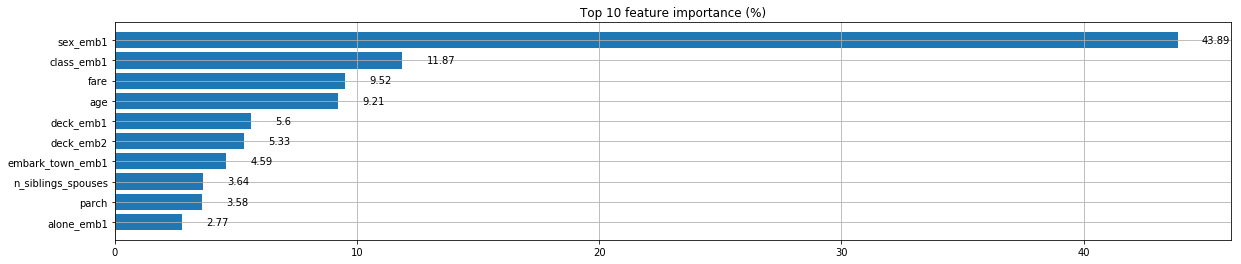


> Feature importances dumped into directory : save

predicting ...
CPU time: 0.2380681037902832 seconds

> Overview on predictions : 

        0.0       1.0  survived_predicted
0  0.876970  0.123030                   0
1  0.627725  0.372275                   0
2  0.232280  0.767720                   1
3  0.229384  0.770616                   1
4  0.741431  0.258569                   0
5  0.310764  0.689236                   1
6  0.565433  0.434567                   0
7  0.879346  0.120654                   0
8  0.467571  0.532429                   1
9  0.334287  0.665713                   1

dumping predictions into directory : save ...


In [15]:
# For Best Parameters from user defined search space
pred.fit_predict(best, df)

***Conclusion***

*   Using the default search space, it achieved accuracy = 72%
*   Using user-defined search space, it achieved accuracy = 74%


